<h2>
Library Imports
</h2>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
init_notebook_mode(connected=True)
cf.go_offline()

<h2>
DataSet Imports
</h2>

<h4>
Dataset Description:</h4>

<h5>Title: Placement Prediction Dataset</h5>

<h6>Introduction:</h6>
<p>
The Placement Prediction Dataset provides detailed information about students from
Geethanjali Engineering College, Nellore, Andhra Pradesh, belonging to the 2015 batch. 
This dataset is a valuable resource for understanding the factors influencing student placements. 
The data includes various attributes of students, offering insights into their academic performance, practical experience,
and other essential aspects.</p>
<br><br>
<h6>Dataset Columns:</h6>

1.Name: The name of the student.<br>
    
2.Roll_no: Unique roll number assigned to each student.<br>
    
3.Age: Age of the student.<br>
    
4.Gender: Gender of the student (Male/Female).<br>
    
5.Branch: Academic discipline or field of study (e.g., Computer Science, Mechanical Engineering, etc.).<br>
    
6.Internships: Number of internships completed by the student, indicating practical experience.<br>
    
7.CGPA: Cumulative Grade Point Average (CGPA) representing the student’s academic performance.<br>
    
8.Hostel: Indicates whether the student resides in a hostel (Yes/No).<br>
    
9.Backlogs: Number of backlogs (unsuccessfully completed courses) the student has.<br>
    
10.PlacedOrNot: Binary variable indicating whether the student has been placed in a job after graduation (Yes/No). This serves as the target variable for placement prediction models.<br>
    
<h6>Purpose:</h6>
<p>
The dataset is collected to facilitate research and analysis in the field of placement prediction.
4It is especially useful for developing machine learning models that can 
predict the likelihood of a student being placed based on various factors such as academic performance,
internships, and backlogs.</p>



<h2>Data Exploitation</h2>

In [3]:
df=pd.read_csv('DataSet1.csv')

<h3>Check for Data Inconsistency</h3>

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2966 entries, 0 to 2965
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   2966 non-null   int64  
 1   Name         2966 non-null   object 
 2   Roll_no      2966 non-null   object 
 3   Age          2966 non-null   int64  
 4   Gender       2966 non-null   object 
 5   Branch       2966 non-null   object 
 6   Internships  2966 non-null   int64  
 7   CGPA         2966 non-null   float64
 8   Hostel       2966 non-null   int64  
 9   Backlogs     2966 non-null   int64  
 10  PlacedOrNot  2966 non-null   int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 255.0+ KB


<h6>There is no inconsistency in the Data</h6>

In [5]:
df.head()

,Unnamed: 0,Name,Roll_no,Age,Gender,Branch,Internships,CGPA,Hostel,Backlogs,PlacedOrNot
0,0,Tanisha,el15b1328,22,Female,Electrical,0,6.31,0,0,0
1,1,Avya,it15b1494,19,Female,Information Technology,1,8.21,0,0,1
2,2,Ramesh,me15b1113,21,Male,Mechanical,0,7.25,1,0,0
3,3,Anjali,ec15b1287,20,Female,Electronics And Communication,1,7.41,0,0,1
4,4,Anika,me15b1190,21,Female,Mechanical,0,7.43,0,0,0


In [6]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [7]:
df.head(10)

,Name,Roll_no,Age,Gender,Branch,Internships,CGPA,Hostel,Backlogs,PlacedOrNot
0,Tanisha,el15b1328,22,Female,Electrical,0,6.31,0,0,0
1,Avya,it15b1494,19,Female,Information Technology,1,8.21,0,0,1
2,Ramesh,me15b1113,21,Male,Mechanical,0,7.25,1,0,0
3,Anjali,ec15b1287,20,Female,Electronics And Communication,1,7.41,0,0,1
4,Anika,me15b1190,21,Female,Mechanical,0,7.43,0,0,0
5,Mallikarjuna Rao,me15b1300,20,Male,Mechanical,1,9.06,1,0,1
6,Yashi,it15b1528,20,Female,Information Technology,3,9.49,1,0,1
7,Sivaprasad,cs15b1599,20,Male,Computer Science,1,7.42,0,0,1
8,Ranjitsinh,el15b1194,21,Male,Electrical,0,6.02,0,1,0
9,Bhupinder,me15b1305,22,Male,Mechanical,0,5.01,0,0,0


In [8]:
df.columns

Index(['Name', 'Roll_no', 'Age', 'Gender', 'Branch', 'Internships', 'CGPA',
       'Hostel', 'Backlogs', 'PlacedOrNot'],
      dtype='object')

In [9]:
#Cateogerical Data
print(df.Branch.value_counts())

Computer Science                 776
Information Technology           691
Mechanical                       424
Electronics And Communication    424
Electrical                       334
Civil                            317
Name: Branch, dtype: int64


In [10]:
df.Gender.value_counts()

Male      1850
Female    1116
Name: Gender, dtype: int64

<h2>Data Analysis</h2>

<h3>Data Cleaning</h3>

<h4>Checking for NULL values</h4>

In [11]:
df.isnull().sum()

Name           0
Roll_no        0
Age            0
Gender         0
Branch         0
Internships    0
CGPA           0
Hostel         0
Backlogs       0
PlacedOrNot    0
dtype: int64

<p>This shows that the data has no missing values</p>

<h4>Checking for Dulplicate values</h4>

In [12]:
df.duplicated().sum()

0

<p>No duplicate values are present<p>

<h4>Outlier Detection</h4>

In [13]:
df.head()

,Name,Roll_no,Age,Gender,Branch,Internships,CGPA,Hostel,Backlogs,PlacedOrNot
0,Tanisha,el15b1328,22,Female,Electrical,0,6.31,0,0,0
1,Avya,it15b1494,19,Female,Information Technology,1,8.21,0,0,1
2,Ramesh,me15b1113,21,Male,Mechanical,0,7.25,1,0,0
3,Anjali,ec15b1287,20,Female,Electronics And Communication,1,7.41,0,0,1
4,Anika,me15b1190,21,Female,Mechanical,0,7.43,0,0,0


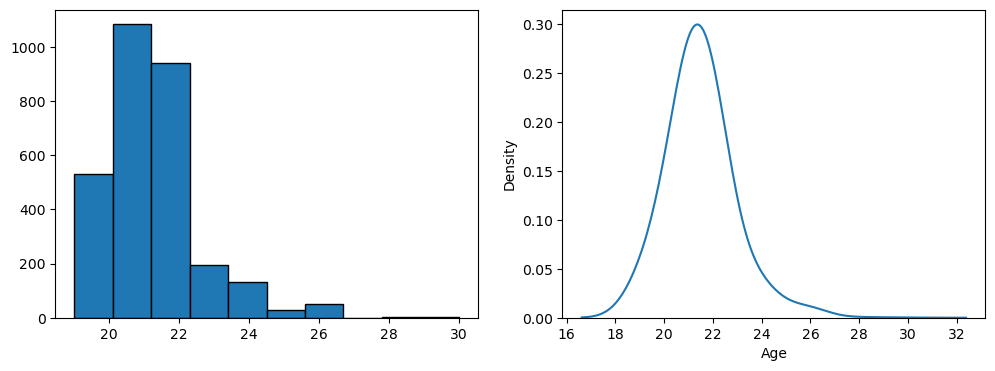

In [14]:
fig,ax=plt.subplots(1,2,figsize=(12,4))
ax[0].hist(df['Age'],bins=10,edgecolor='black')
sns.kdeplot(df,x='Age',ax=ax[1],bw_method=0.6)
plt.show()

<Axes: xlabel='Age'>

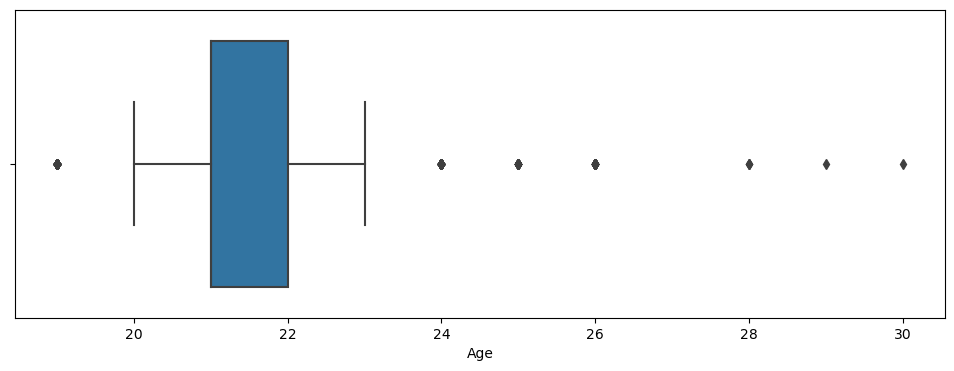

In [15]:
fig,ax=plt.subplots(1,1,figsize=(12,4))
sns.boxplot(df,x='Age',ax=ax)

In [16]:
# Calculate Q1 and Q3
Q1 = np.percentile(df.Age, 25)
Q3 = np.percentile(df.Age, 75)

# Calculate IQR
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("Q1: ",Q1)
print("Q3: ",Q3)
print("lower_bound: ",lower_bound)
print("upper_bound: ",upper_bound)
print("IQR: ",IQR)


Q1:  21.0
Q3:  22.0
lower_bound:  19.5
upper_bound:  23.5
IQR:  1.0


<h6>So Age>23.5 and Age<19.5 are Outliers of our Data</h6>

In [17]:
df[(df.Age<19.5) | (df.Age>23.5)]

,Name,Roll_no,Age,Gender,Branch,Internships,CGPA,Hostel,Backlogs,PlacedOrNot
1,Avya,it15b1494,19,Female,Information Technology,1,8.21,0,0,1
12,Riva,it15b1515,19,Female,Information Technology,0,9.50,0,1,1
14,Kyra,cs15b1330,25,Female,Computer Science,0,7.31,0,0,0
15,Devang,ec15b1342,19,Male,Electronics And Communication,1,6.49,1,0,0
16,Aria,cs15b1328,24,Female,Computer Science,0,6.36,0,1,1
...,...,...,...,...,...,...,...,...,...,...
2930,Amit,me15b1193,26,Male,Mechanical,0,7.48,0,1,0
2931,Dinesh,it15b1393,24,Male,Information Technology,1,7.38,0,0,1
2936,Anshi,it15b1037,24,Female,Information Technology,1,5.38,0,0,0
2941,Sana,el15b1275,19,Female,Electrical,2,8.35,0,1,1


In [18]:
# Remove outliers
removed_indices=list(df[(df.Age<19.5) | (df.Age>23.5)].index)

# drop rows from Data
df.drop(index=removed_indices,inplace=True)

Data after removing outliers


<Axes: xlabel='Age'>

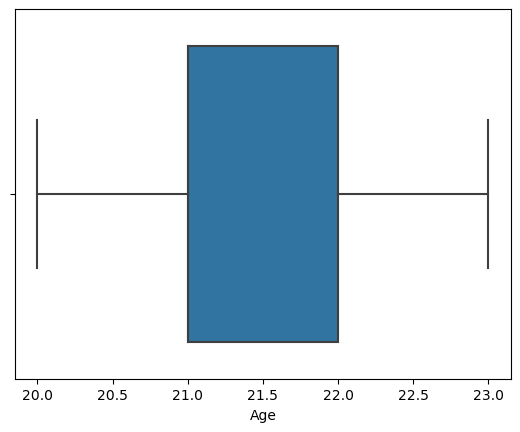

In [19]:
# Print the filtered data
print("Data after removing outliers")
sns.boxplot(df,x='Age')

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2595 entries, 0 to 2965
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         2595 non-null   object 
 1   Roll_no      2595 non-null   object 
 2   Age          2595 non-null   int64  
 3   Gender       2595 non-null   object 
 4   Branch       2595 non-null   object 
 5   Internships  2595 non-null   int64  
 6   CGPA         2595 non-null   float64
 7   Hostel       2595 non-null   int64  
 8   Backlogs     2595 non-null   int64  
 9   PlacedOrNot  2595 non-null   int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 223.0+ KB


<h6>We will repeat the same for CGPA column as well</h6>

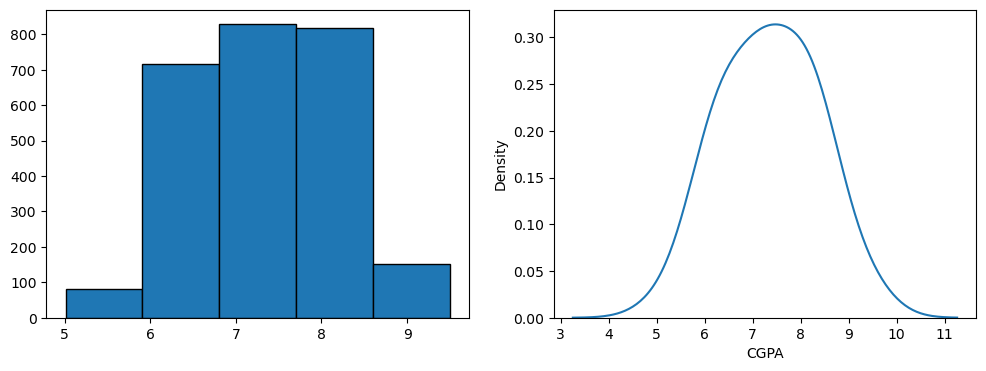

In [21]:
fig,ax=plt.subplots(1,2,figsize=(12,4))
ax[0].hist(df['CGPA'],bins=5,edgecolor='black')
sns.kdeplot(df,x='CGPA',ax=ax[1],bw_method=0.6)
plt.show()

<Axes: xlabel='CGPA'>

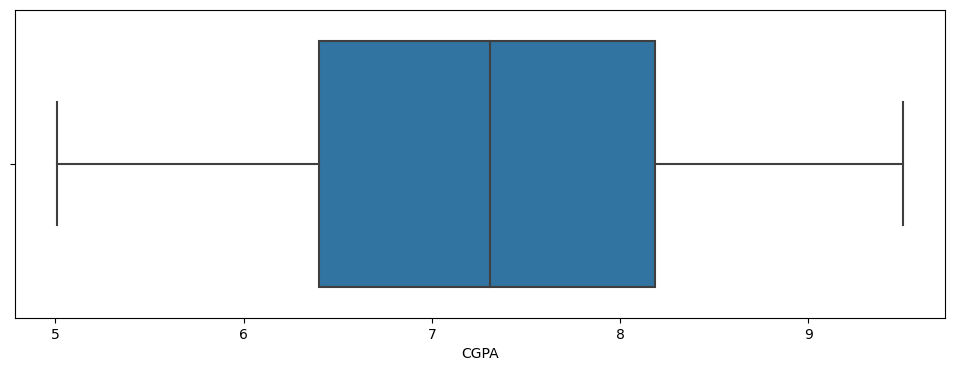

In [22]:
fig,ax=plt.subplots(1,1,figsize=(12,4))
sns.boxplot(df,x='CGPA',ax=ax)

<h6>No outliers in CGPA column</h6>

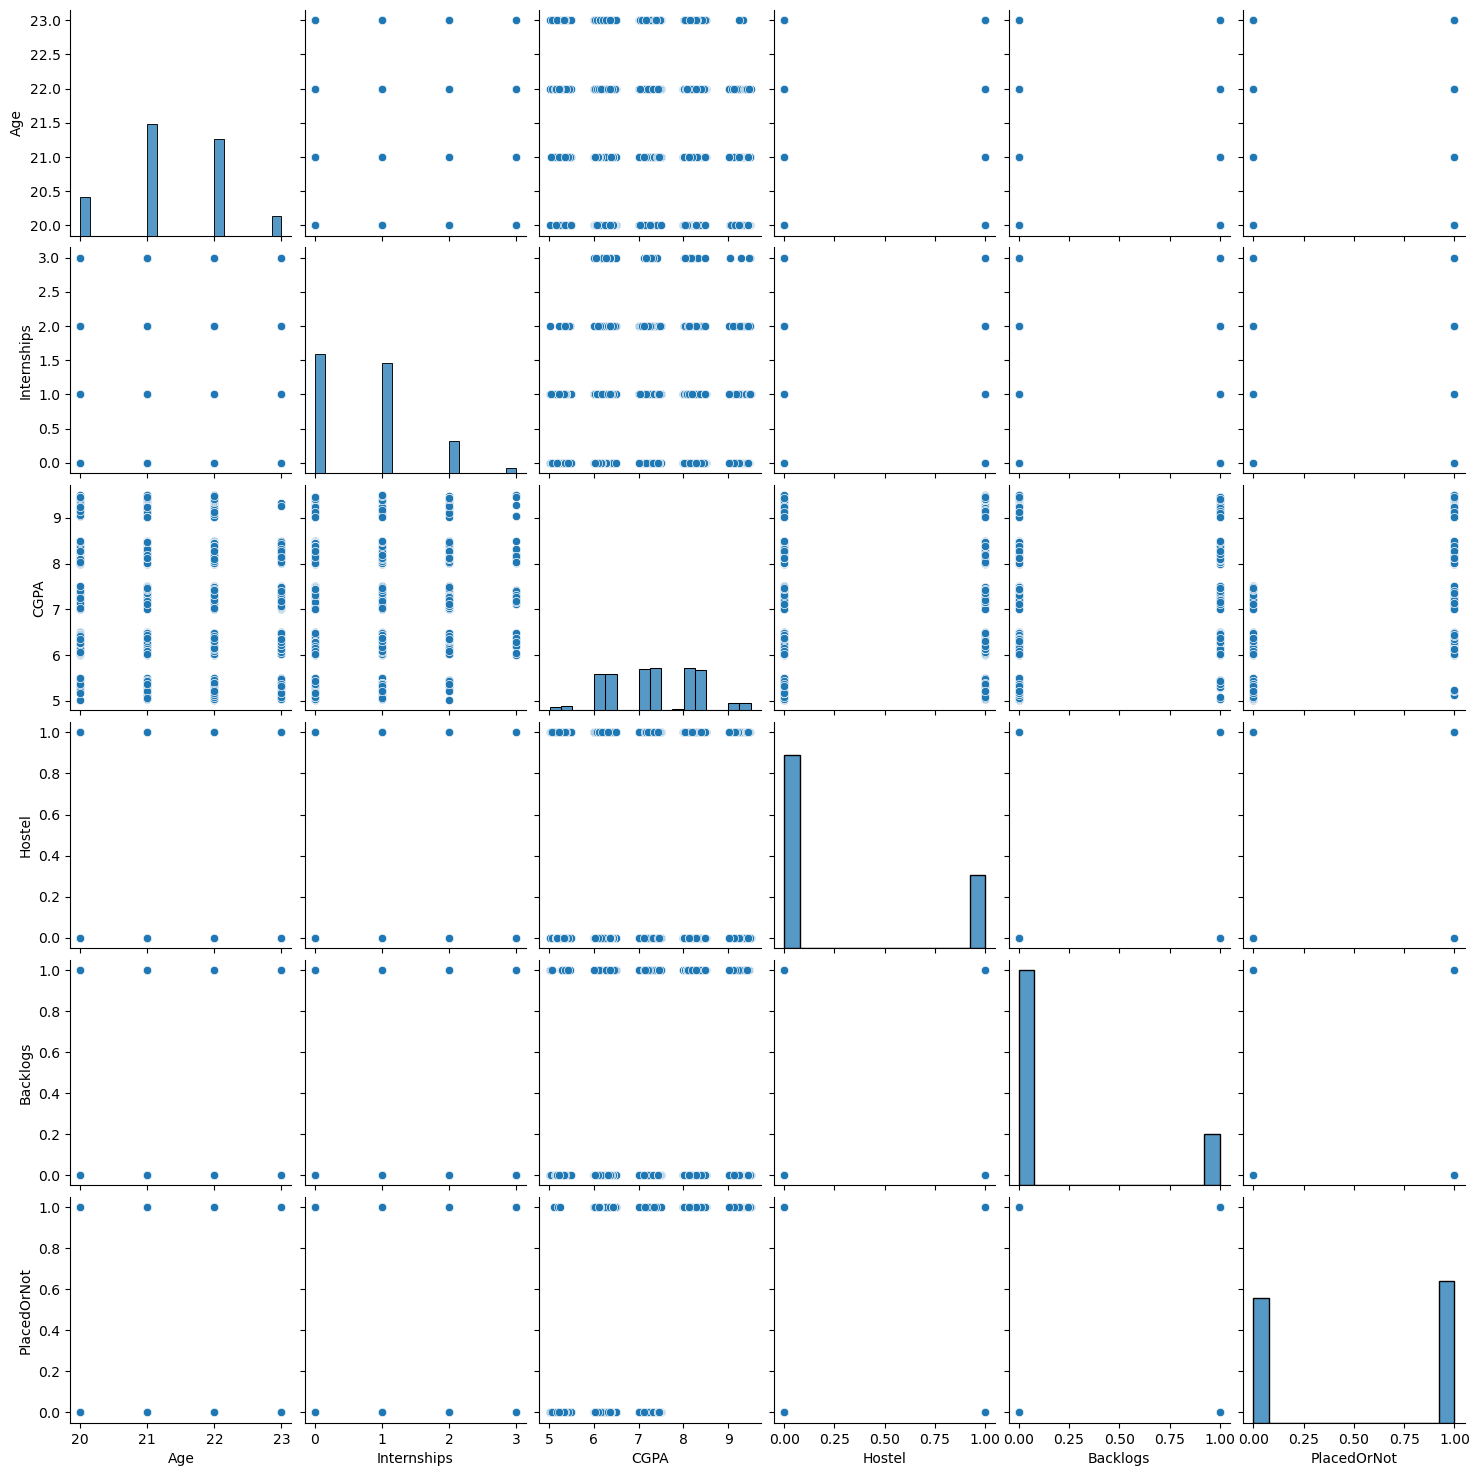

In [23]:
sns.pairplot(df)

<h3>Data Transformation</h3>

<h6>Convert Categorical Columns to Numeric Columns</h6>

In [24]:
#Gender column
df.Gender=df.Gender.apply(lambda x:1 if x=='Male' else 0)

In [25]:
df.head()

,Name,Roll_no,Age,Gender,Branch,Internships,CGPA,Hostel,Backlogs,PlacedOrNot
0,Tanisha,el15b1328,22,0,Electrical,0,6.31,0,0,0
2,Ramesh,me15b1113,21,1,Mechanical,0,7.25,1,0,0
3,Anjali,ec15b1287,20,0,Electronics And Communication,1,7.41,0,0,1
4,Anika,me15b1190,21,0,Mechanical,0,7.43,0,0,0
5,Mallikarjuna Rao,me15b1300,20,1,Mechanical,1,9.06,1,0,1


In [26]:
#Convertion of Branch Column
df= pd.get_dummies(df, columns=['Branch'])

In [27]:
df.head()

,Name,Roll_no,Age,Gender,Internships,CGPA,Hostel,Backlogs,PlacedOrNot,Branch_Civil,Branch_Computer Science,Branch_Electrical,Branch_Electronics And Communication,Branch_Information Technology,Branch_Mechanical
0,Tanisha,el15b1328,22,0,0,6.31,0,0,0,0,0,1,0,0,0
2,Ramesh,me15b1113,21,1,0,7.25,1,0,0,0,0,0,0,0,1
3,Anjali,ec15b1287,20,0,1,7.41,0,0,1,0,0,0,1,0,0
4,Anika,me15b1190,21,0,0,7.43,0,0,0,0,0,0,0,0,1
5,Mallikarjuna Rao,me15b1300,20,1,1,9.06,1,0,1,0,0,0,0,0,1


In [28]:
placed=df.PlacedOrNot

In [29]:
#rearragement of columns PlacedOrNot with Branches
df.drop('PlacedOrNot',axis=1,inplace=True)
df=pd.concat([df,placed],axis=1)

In [30]:
df.head()

,Name,Roll_no,Age,Gender,Internships,CGPA,Hostel,Backlogs,Branch_Civil,Branch_Computer Science,Branch_Electrical,Branch_Electronics And Communication,Branch_Information Technology,Branch_Mechanical,PlacedOrNot
0,Tanisha,el15b1328,22,0,0,6.31,0,0,0,0,1,0,0,0,0
2,Ramesh,me15b1113,21,1,0,7.25,1,0,0,0,0,0,0,1,0
3,Anjali,ec15b1287,20,0,1,7.41,0,0,0,0,0,1,0,0,1
4,Anika,me15b1190,21,0,0,7.43,0,0,0,0,0,0,0,1,0
5,Mallikarjuna Rao,me15b1300,20,1,1,9.06,1,0,0,0,0,0,0,1,1


<h4>Drop Unnecessary Columns</h4>

In [31]:
df.drop(['Name','Roll_no'],axis=1,inplace=True)

In [32]:
df.head()

,Age,Gender,Internships,CGPA,Hostel,Backlogs,Branch_Civil,Branch_Computer Science,Branch_Electrical,Branch_Electronics And Communication,Branch_Information Technology,Branch_Mechanical,PlacedOrNot
0,22,0,0,6.31,0,0,0,0,1,0,0,0,0
2,21,1,0,7.25,1,0,0,0,0,0,0,1,0
3,20,0,1,7.41,0,0,0,0,0,1,0,0,1
4,21,0,0,7.43,0,0,0,0,0,0,0,1,0
5,20,1,1,9.06,1,0,0,0,0,0,0,1,1


<h3>Feature Selection</h3>

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X_train,X_test,y_train,y_test=train_test_split(df[['Age', 'Gender', 'Internships', 'CGPA', 'Hostel', 'Backlogs',
       'Branch_Civil', 'Branch_Computer Science', 'Branch_Electrical',
       'Branch_Electronics And Communication', 'Branch_Information Technology',
       'Branch_Mechanical']],df['PlacedOrNot'],test_size=0.2,random_state=101)

In [78]:
df.corr()

,Age,Gender,Internships,CGPA,Hostel,Backlogs,Branch_Civil,Branch_Computer Science,Branch_Electrical,Branch_Electronics And Communication,Branch_Information Technology,Branch_Mechanical,PlacedOrNot
Age,1.000000,0.002896,0.023038,-0.101761,0.014697,-0.040764,-0.006161,-0.017903,-0.032105,0.006146,0.017061,0.029979,-0.055604
Gender,0.002896,1.000000,-0.010918,-0.005441,0.056398,0.007484,-0.004039,0.021808,-0.019687,-0.015255,-0.032509,0.049013,-0.000107
Internships,0.023038,-0.010918,1.000000,0.022249,0.010917,-0.021565,-0.063542,0.136585,-0.051537,0.021301,0.011426,-0.102706,0.182605
CGPA,-0.101761,-0.005441,0.022249,1.000000,0.009526,-0.003968,0.003378,-0.010569,-0.013319,0.025024,0.002473,-0.005812,0.631362
Hostel,0.014697,0.056398,0.010917,0.009526,1.000000,0.105952,-0.028545,-0.080477,-0.117348,-0.126987,-0.181032,0.579111,-0.021484
Backlogs,-0.040764,0.007484,-0.021565,-0.003968,0.105952,1.000000,-0.026490,-0.026732,0.046664,0.064421,-0.035607,-0.006933,-0.030747
Branch_Civil,-0.006161,-0.004039,-0.063542,0.003378,-0.028545,-0.026490,1.000000,-0.202710,-0.123803,-0.141633,-0.192658,-0.141190,-0.063021
Branch_Computer Science,-0.017903,0.021808,0.136585,-0.010569,-0.080477,-0.026732,-0.202710,1.000000,-0.210010,-0.240257,-0.326812,-0.239504,0.025035
Branch_Electrical,-0.032105,-0.019687,-0.051537,-0.013319,-0.117348,0.046664,-0.123803,-0.210010,1.000000,-0.146734,-0.199596,-0.146274,-0.001861
Branch_Electronics And Communication,0.006146,-0.015255,0.021301,0.025024,-0.126987,0.064421,-0.141633,-0.240257,-0.146734,1.000000,-0.228343,-0.167341,0.032546


<Axes: >

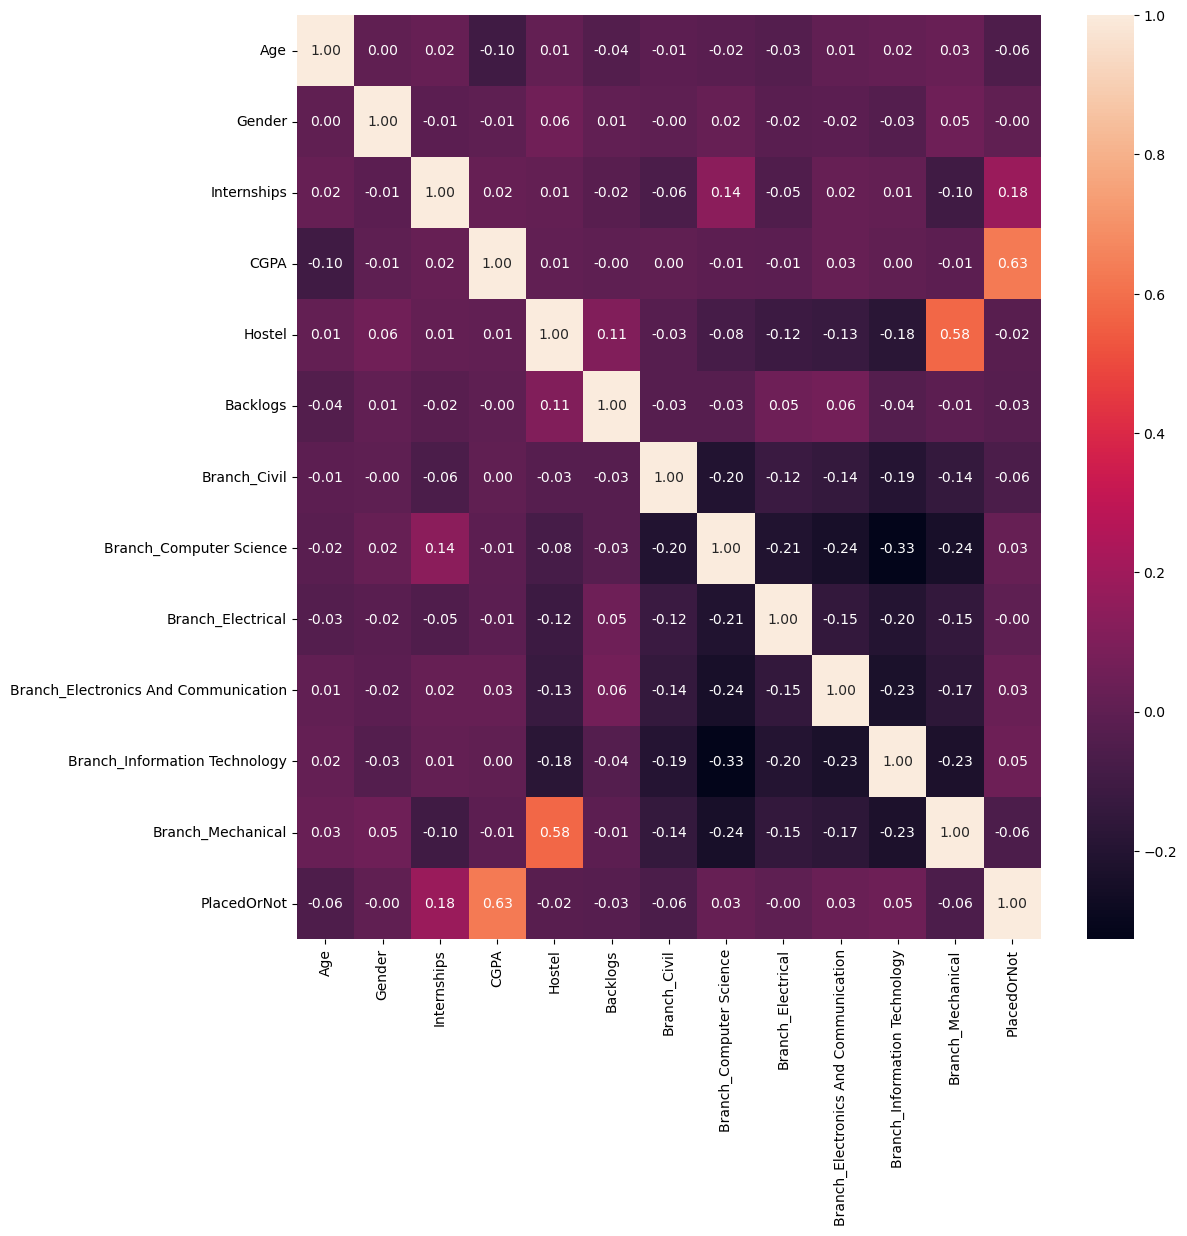

In [36]:
plt.figure(figsize=(12, 12))
sns.heatmap(df.corr(),annot=True,fmt='.2f')

<h4>Observing the Correlation Matrix it is clear that the Many of the features are not so Correlated with target variable.
<br>
So it is good to reduce the features which are redundant Using PCA</h4>

<h6> Since all the data is not on the same scale we should normalize the data </h6>

In [37]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

<h3>PCA</h3>

In [38]:
from sklearn.decomposition import PCA

In [39]:
# Apply PCA to the standardized training data
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)

# Transform the test data using the PCA components from the training data
X_test_pca = pca.transform(X_test)

<h4>Visualizing the New Data</h4>

In [40]:
X_train_pca

array([[-1.0118266 , -0.35509154],
       [-0.72188221, -1.24539779],
       [ 2.96049149,  0.11243509],
       ...,
       [ 1.40900161, -0.73800707],
       [-0.37563706, -0.75984838],
       [-1.27231274, -0.57240882]])

In [41]:
X_train_pca=pd.DataFrame(X_train_pca,columns=['f1','f2'])

In [42]:
train_pca=pd.concat([X_train_pca,y_train.reset_index(drop=True)],axis=1)

In [43]:
train_pca.head()

,f1,f2,PlacedOrNot
0,-1.011827,-0.355092,0
1,-0.721882,-1.245398,1
2,2.960491,0.112435,0
3,-0.708113,-1.207341,0
4,-0.598759,1.503743,1


<Axes: >

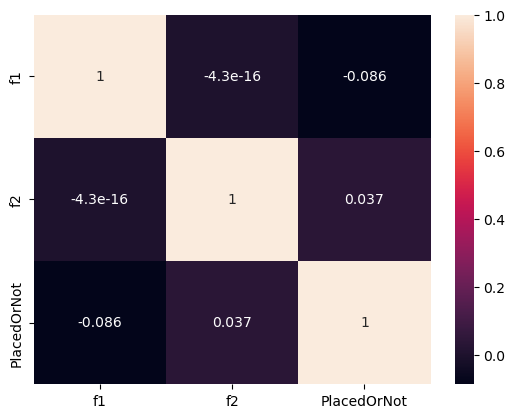

In [44]:
sns.heatmap(train_pca.corr(),annot=True)

In [45]:
X_train_pca=X_train_pca.values

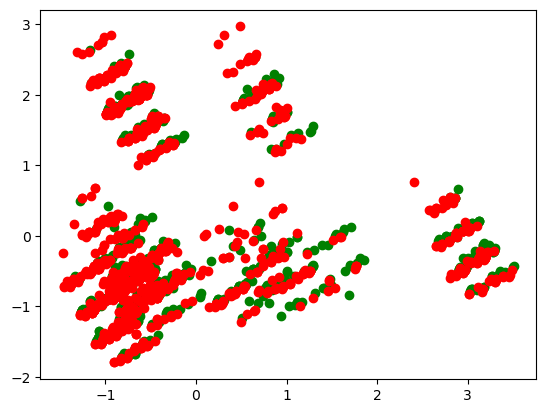

In [46]:
fig,ax=plt.subplots(1,1)
ax.scatter(X_train_pca[y_train==0][:,0],X_train_pca[y_train==0][:,1],color='green')
ax.scatter(X_train_pca[y_train==1][:,0],X_train_pca[y_train==1][:,1],color='red')
plt.show()

In [47]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [48]:
X_train


array([[-0.45365116, -1.27979112,  0.39075945, ...,  2.41432131,
        -0.55954712, -0.4061812 ],
       [ 0.77102999,  0.78137751, -0.95009447, ..., -0.41419508,
         1.78715959, -0.4061812 ],
       [-0.45365116,  0.78137751,  0.39075945, ..., -0.41419508,
        -0.55954712,  2.46195542],
       ...,
       [-0.45365116,  0.78137751, -0.95009447, ..., -0.41419508,
        -0.55954712, -0.4061812 ],
       [ 0.77102999, -1.27979112, -0.95009447, ..., -0.41419508,
        -0.55954712, -0.4061812 ],
       [ 0.77102999, -1.27979112,  1.73161337, ..., -0.41419508,
         1.78715959, -0.4061812 ]])

In [49]:
# Apply LDA to the standardized training data
lda = LinearDiscriminantAnalysis()
lda.fit(X_train,y_train)

LinearDiscriminantAnalysis()

In [50]:
# Transform the training and test data using the LDA model
X_train_lda = lda.transform(X_train)
X_test_lda = lda.transform(X_test)

In [51]:
X_train_lda

array([[-0.37841719],
       [ 0.30683805],
       [ 0.52870372],
       ...,
       [ 2.02330301],
       [ 0.79861803],
       [ 0.9325934 ]])

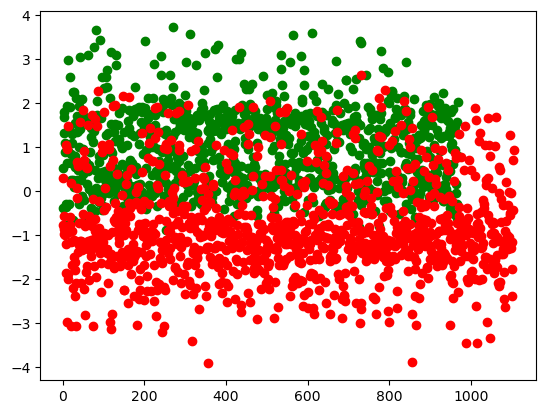

In [52]:
fig,ax=plt.subplots(1,1)
ax.scatter(range(len(X_train_lda[y_train==0])),X_train_lda[y_train==0],color='green')
ax.scatter(range(len(X_train_lda[y_train==1])),X_train_lda[y_train==1],color='red')
plt.show()

<h3>Data Separation</h3>

In [53]:
from sklearn.metrics import classification_report

In [70]:
from sklearn.linear_model import LogisticRegression
l=LogisticRegression()

print("ORIGINAL DATA SET")
l.fit(X_train,y_train)
pred=l.predict(X_test)
print(classification_report(y_test,pred))


print("PCA DATA SET")
#for pca columns
l.fit(X_train_pca,y_train)
pred=l.predict(X_test_pca)
print(classification_report(y_test,pred))

print("LDA DATA SET")
l.fit(X_train_lda,y_train)
pred=l.predict(X_test_lda)
print(classification_report(y_test,pred))

ORIGINAL DATA SET
              precision    recall  f1-score   support

           0       0.79      0.84      0.81       246
           1       0.84      0.79      0.82       273

    accuracy                           0.82       519
   macro avg       0.82      0.82      0.81       519
weighted avg       0.82      0.82      0.82       519

PCA DATA SET
              precision    recall  f1-score   support

           0       0.52      0.21      0.30       246
           1       0.54      0.83      0.65       273

    accuracy                           0.53       519
   macro avg       0.53      0.52      0.47       519
weighted avg       0.53      0.53      0.48       519

LDA DATA SET
              precision    recall  f1-score   support

           0       0.79      0.83      0.81       246
           1       0.84      0.80      0.82       273

    accuracy                           0.81       519
   macro avg       0.81      0.81      0.81       519
weighted avg       0.81      0

In [74]:
from sklearn.ensemble import RandomForestClassifier
r=RandomForestClassifier()

print("ORIGINAL DATA SET")
r.fit(X_train,y_train)
pred=r.predict(X_test)

print(classification_report(y_test,pred))
pred1=r.predict(X_train)
print(classification_report(y_train,pred1))

print("PCA DATA SET")
#for pca columns
r.fit(X_train_pca,y_train)
pred=r.predict(X_test_pca)
print(classification_report(y_test,pred))

print("LDA DATA SET")
r.fit(X_train_lda,y_train)
pred=r.predict(X_test_lda)
print(classification_report(y_test,pred))

ORIGINAL DATA SET
              precision    recall  f1-score   support

           0       0.83      0.90      0.86       246
           1       0.90      0.83      0.87       273

    accuracy                           0.87       519
   macro avg       0.87      0.87      0.87       519
weighted avg       0.87      0.87      0.87       519

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       970
           1       1.00      0.99      0.99      1106

    accuracy                           0.99      2076
   macro avg       0.99      0.99      0.99      2076
weighted avg       0.99      0.99      0.99      2076

PCA DATA SET
              precision    recall  f1-score   support

           0       0.74      0.80      0.77       246
           1       0.80      0.75      0.78       273

    accuracy                           0.77       519
   macro avg       0.77      0.77      0.77       519
weighted avg       0.77      0.77      0.77

In [72]:
from sklearn.neighbors import KNeighborsClassifier
k=KNeighborsClassifier()

print("ORIGINAL DATA SET")
k.fit(X_train,y_train)
pred=k.predict(X_test)
print(classification_report(y_test,pred))

print("PCA DATA SET")
#for pca columns
k.fit(X_train_pca,y_train)
pred=k.predict(X_test_pca)
print(classification_report(y_test,pred))

print("LDA DATA SET")
k.fit(X_train_lda,y_train)
pred=k.predict(X_test_lda)
print(classification_report(y_test,pred))

ORIGINAL DATA SET
              precision    recall  f1-score   support

           0       0.80      0.89      0.84       246
           1       0.89      0.79      0.84       273

    accuracy                           0.84       519
   macro avg       0.85      0.84      0.84       519
weighted avg       0.85      0.84      0.84       519

PCA DATA SET
              precision    recall  f1-score   support

           0       0.70      0.79      0.74       246
           1       0.79      0.70      0.74       273

    accuracy                           0.74       519
   macro avg       0.74      0.74      0.74       519
weighted avg       0.75      0.74      0.74       519

LDA DATA SET
              precision    recall  f1-score   support

           0       0.76      0.90      0.82       246
           1       0.89      0.74      0.81       273

    accuracy                           0.82       519
   macro avg       0.82      0.82      0.81       519
weighted avg       0.83      0

In [76]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svm_model = SVC(kernel='rbf')  

print("ORIGINAL DATA SET")
svm_model.fit(X_train,y_train)
pred=svm_model.predict(X_test)
print(classification_report(y_test,pred))
pred1=svm_model.predict(X_train)
print(classification_report(y_train,pred1))

print("PCA DATA SET")
#for pca columns
svm_model.fit(X_train_pca,y_train)
pred=svm_model.predict(X_test_pca)
print(classification_report(y_test,pred))

print("LDA DATA SET")
svm_model.fit(X_train_lda,y_train)
pred=svm_model.predict(X_test_lda)
print(classification_report(y_test,pred))


ORIGINAL DATA SET
              precision    recall  f1-score   support

           0       0.80      0.97      0.88       246
           1       0.97      0.78      0.86       273

    accuracy                           0.87       519
   macro avg       0.88      0.88      0.87       519
weighted avg       0.89      0.87      0.87       519

              precision    recall  f1-score   support

           0       0.83      0.96      0.89       970
           1       0.96      0.82      0.89      1106

    accuracy                           0.89      2076
   macro avg       0.89      0.89      0.89      2076
weighted avg       0.90      0.89      0.89      2076

PCA DATA SET
              precision    recall  f1-score   support

           0       0.49      0.27      0.35       246
           1       0.53      0.75      0.62       273

    accuracy                           0.52       519
   macro avg       0.51      0.51      0.49       519
weighted avg       0.51      0.52      0.49

In [57]:
df.columns

Index(['Age', 'Gender', 'Internships', 'CGPA', 'Hostel', 'Backlogs',
       'Branch_Civil', 'Branch_Computer Science', 'Branch_Electrical',
       'Branch_Electronics And Communication', 'Branch_Information Technology',
       'Branch_Mechanical', 'PlacedOrNot'],
      dtype='object')